In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "/Users/ibrahim/Desktop/final/hucre.png"
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3, 3), np.uint8)
_kernel = np.array([[-1, -1, -1], [-1, 9, -1],[-1, -1, -1]])

In [30]:
def sharpening(image):
    sharp = cv2.filter2D(image, -1, _kernel)
    plt.subplot(1, 1, 1)
    plt.imshow(sharp, cmap="gray")
    plt.axis('off')
    plt.show()
    return sharp

In [31]:
def blurred(image):
    blurred = cv2.GaussianBlur(image, (31, 31), 0)
    plt.imshow(blurred, cmap="gray")
    plt.axis('off')
    plt.show()
    return blurred

In [41]:
def threshold(image):
    _threshold = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 17, 3)
    plt.imshow(_threshold, cmap="gray")
    plt.axis('off')
    return _threshold

In [42]:
def eroded(image):
    _eroded = cv2.erode(image, kernel, iterations=1)
    plt.imshow(_eroded, cmap="gray")
    plt.axis('off')
    return _eroded

In [43]:
def bitwise(image):
    _bitwise = cv2.bitwise_not(image) 
    plt.imshow(_bitwise, cmap="gray")
    return _bitwise

In [44]:
def dilate(image):
    _dilate = cv2.dilate(image,kernel,iterations=1)
    plt.imshow(_dilate, cmap="gray")
    return _dilate

In [45]:
def result(image):
    thresh, im_tr = cv2.threshold(image,0, 255,cv2.THRESH_OTSU)
    nb_components, comp, stats, centroids = cv2.connectedComponentsWithStats(im_tr, connectivity=8)
    plt.imshow(comp, cmap="nipy_spectral")
    return comp

In [46]:
def Directioin_Circularity(image):
    kenarlar = cv2.Canny(image, threshold1=30, threshold2=100)
    _, labels = cv2.connectedComponents(kenarlar)

    for label in range(1, np.max(labels)+1):
        Label= np.sum(labels == label)    
        moments = cv2.moments(np.uint8(labels == label))
        Directioin = 0.5 * np.arctan2(2 * moments['mu11'], moments['mu20'] - moments['mu02'])    
        Circularity = 4 * np.pi * Label / (moments['m00'] ** 2)    
        print(f'{label}: Label = {Label}')
        print(f'{label}: Directioin = {Directioin}')
        print(f'{label}: Circularity = {Circularity}')

In [47]:
def ARC_Compact(image):
    kenarlar = cv2.Canny(image, threshold1=30, threshold2=100)
    _, labels = cv2.connectedComponents(kenarlar)
    for label in range(1, np.max(labels)+1):
        Label = np.sum(labels == label) 
        Contour, _ = cv2.findContours((labels == label).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        ARC = cv2.arcLength(Contour[0], True)   
        Compact = 4 * np.pi * Label / (ARC ** 2)    
        print(f'{label}: Label = {Label}')
        print(f'{label}: ARC = {ARC}')
        print(f'{label}: Compact = {Compact}')

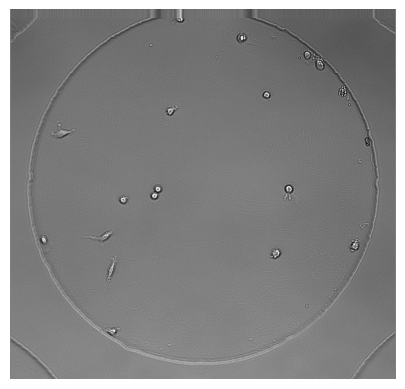

In [48]:
_sharpening = sharpening(image)

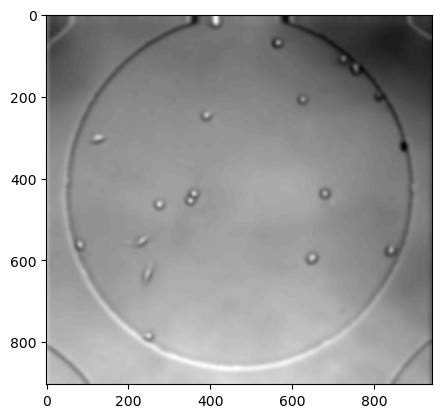

In [49]:
_blurred = blurred(_sharpening)
Directioin_Circularity(_blurred)
ARC_Compact(_blurred)

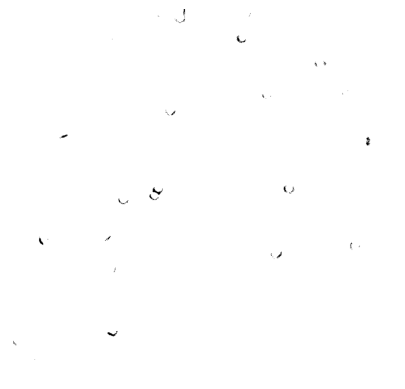

In [52]:
_threshold = threshold(_blurred)

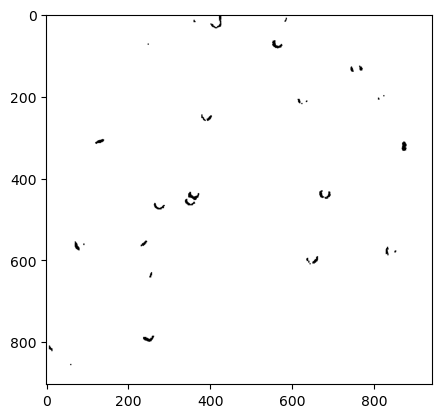

In [51]:
_eroded = eroded(_threshold)

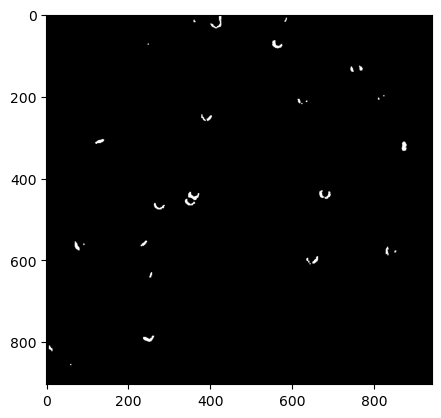

In [24]:
_bitwise = bitwise(_eroded)

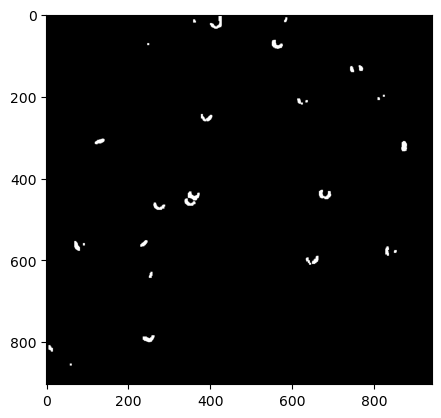

In [25]:
_dilate = dilate(_bitwise)

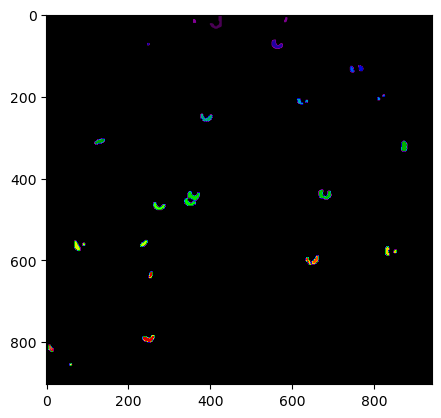

In [26]:
_result = result(_dilate)

In [28]:
Directioin_Circularity(_dilate)

1: Label = 32
1: Directioin = -1.5065612916306559
1: Circularity = 0.39269908169872414
2: Label = 85
2: Directioin = -0.6577201364502975
2: Circularity = 0.1478396542865785
3: Label = 32
3: Directioin = -1.2005244553568475
3: Circularity = 0.39269908169872414
4: Label = 24
4: Directioin = 1.044818221747218
4: Circularity = 0.5235987755982988
5: Label = 82
5: Directioin = 0.47275615521397696
5: Circularity = 0.15324842212633136
6: Label = 16
6: Directioin = -0.7853981633974483
6: Circularity = 0.7853981633974483
7: Label = 40
7: Directioin = 1.1149434956373614
7: Circularity = 0.3141592653589793
8: Label = 40
8: Directioin = 1.2623747599409971
8: Circularity = 0.3141592653589793
9: Label = 16
9: Directioin = -0.7853981633974483
9: Circularity = 0.7853981633974483
10: Label = 21
10: Directioin = 1.2214664144278067
10: Circularity = 0.5983986006837702
11: Label = 47
11: Directioin = 0.8755525561231426
11: Circularity = 0.26736958753955686
12: Label = 20
12: Directioin = -0.785398163411387

In [29]:
ARC_Compact(_dilate)

1: Label = 32
1: ARC = 67.21320307254791
1: Compact = 0.08901243007127879
2: Label = 85
2: ARC = 176.4680358171463
2: Compact = 0.03430020266889435
3: Label = 32
3: ARC = 34.72792184352875
3: Compact = 0.33342814131739945
4: Label = 24
4: ARC = 26.485281229019165
4: Compact = 0.42994403522022967
5: Label = 82
5: ARC = 91.35533821582794
5: Compact = 0.12346841039485212
6: Label = 16
6: ARC = 17.656854152679443
6: Compact = 0.6449160528303446
7: Label = 40
7: ARC = 43.55634891986847
7: Compact = 0.2649518272487941
8: Label = 40
8: ARC = 43.55634891986847
8: Compact = 0.2649518272487941
9: Label = 16
9: ARC = 17.656854152679443
9: Compact = 0.6449160528303446
10: Label = 21
10: ARC = 23.071067690849304
10: Compact = 0.49578544395653823
11: Label = 47
11: ARC = 50.38477599620819
11: Compact = 0.23265321468953798
12: Label = 20
12: ARC = 21.656854152679443
12: Compact = 0.5358572563049142
13: Label = 90
13: ARC = 187.82337403297424
13: Compact = 0.03205923077129443
14: Label = 59
14: ARC = 